In [67]:
#Imports
from collections import Counter
import pandas as pd
from ast import literal_eval
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
import glob
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve, auc, confusion_matrix, roc_auc_score
import math
import pdb

In [68]:
bins = np.array([-5.47712125, -4.77712125, -4.07712125, -3.37712125, -2.69897,
       -1.97712125, -1.27712125, -0.57712125,  0.12287875,  0.82287875])

In [93]:
base = '/hdd/pbryant/results/mhc/20190911/'
true = np.load(base+'true.npy', allow_pickle = True)
pred = np.load(base+'pred.npy', allow_pickle = True)

In [70]:
a = [-1,-2,-2.7,-3, -4, -5]
print(np.digitize(a, bins))
#Bin 4 and below contains the positives since <=500 nM is considered nonbinding
-np.log10(500)

[7 5 4 4 3 1]


-2.6989700043360187

In [71]:
true

array([3, 3, 4, ..., 3, 5, 8])

In [72]:
true_new = []
for i in range(len(true)):
    if true[i] == -0.: #positiv
        true[i]=-3
    if true[i] == math.inf:
        true[i]=-1
    
true

array([3, 3, 4, ..., 3, 5, 8])

(0.7508298101319423, 0.0)

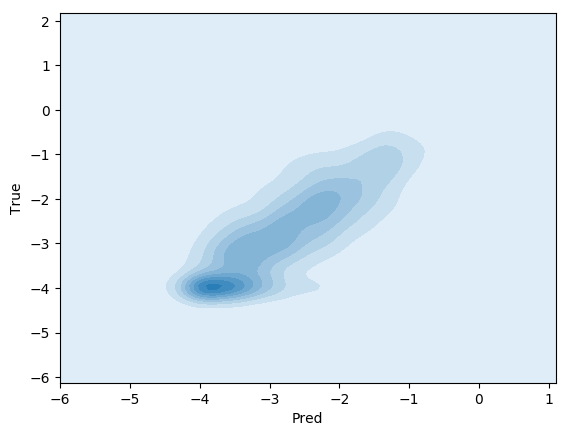

In [94]:
ax = sns.kdeplot(pred, true, shade = True)
plt.xlabel('Pred')
plt.ylabel('True')
stats.pearsonr(pred, true)

In [96]:
#bin data
true_binned = np.digitize(true,bins)
pred_binned = np.digitize(pred,bins)
true = true_binned
pred = pred_binned
true_binary = []
pred_binary = []
for i in range(len(true)):
    if true[i]<=4:
        true_binary.append(1)
    else:
        true_binary.append(0)
    if pred[i]<=4:
        pred_binary.append(1)
    else:
        pred_binary.append(0)

In [89]:
#Accuracy in predicting binding/not
1-np.sum(np.absolute(np.asarray(true_binary)-np.asarray(pred_binary)))/len(true_binary)

0.8087207901710431

Text(0, 0.5, 'count')

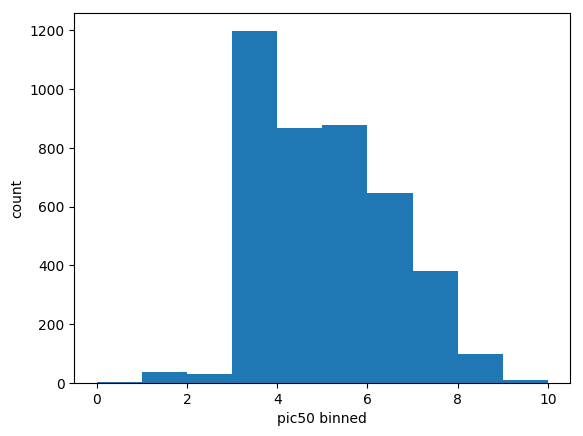

In [98]:
plt.hist(true)
plt.xlabel('pic50 binned')
plt.ylabel('count')

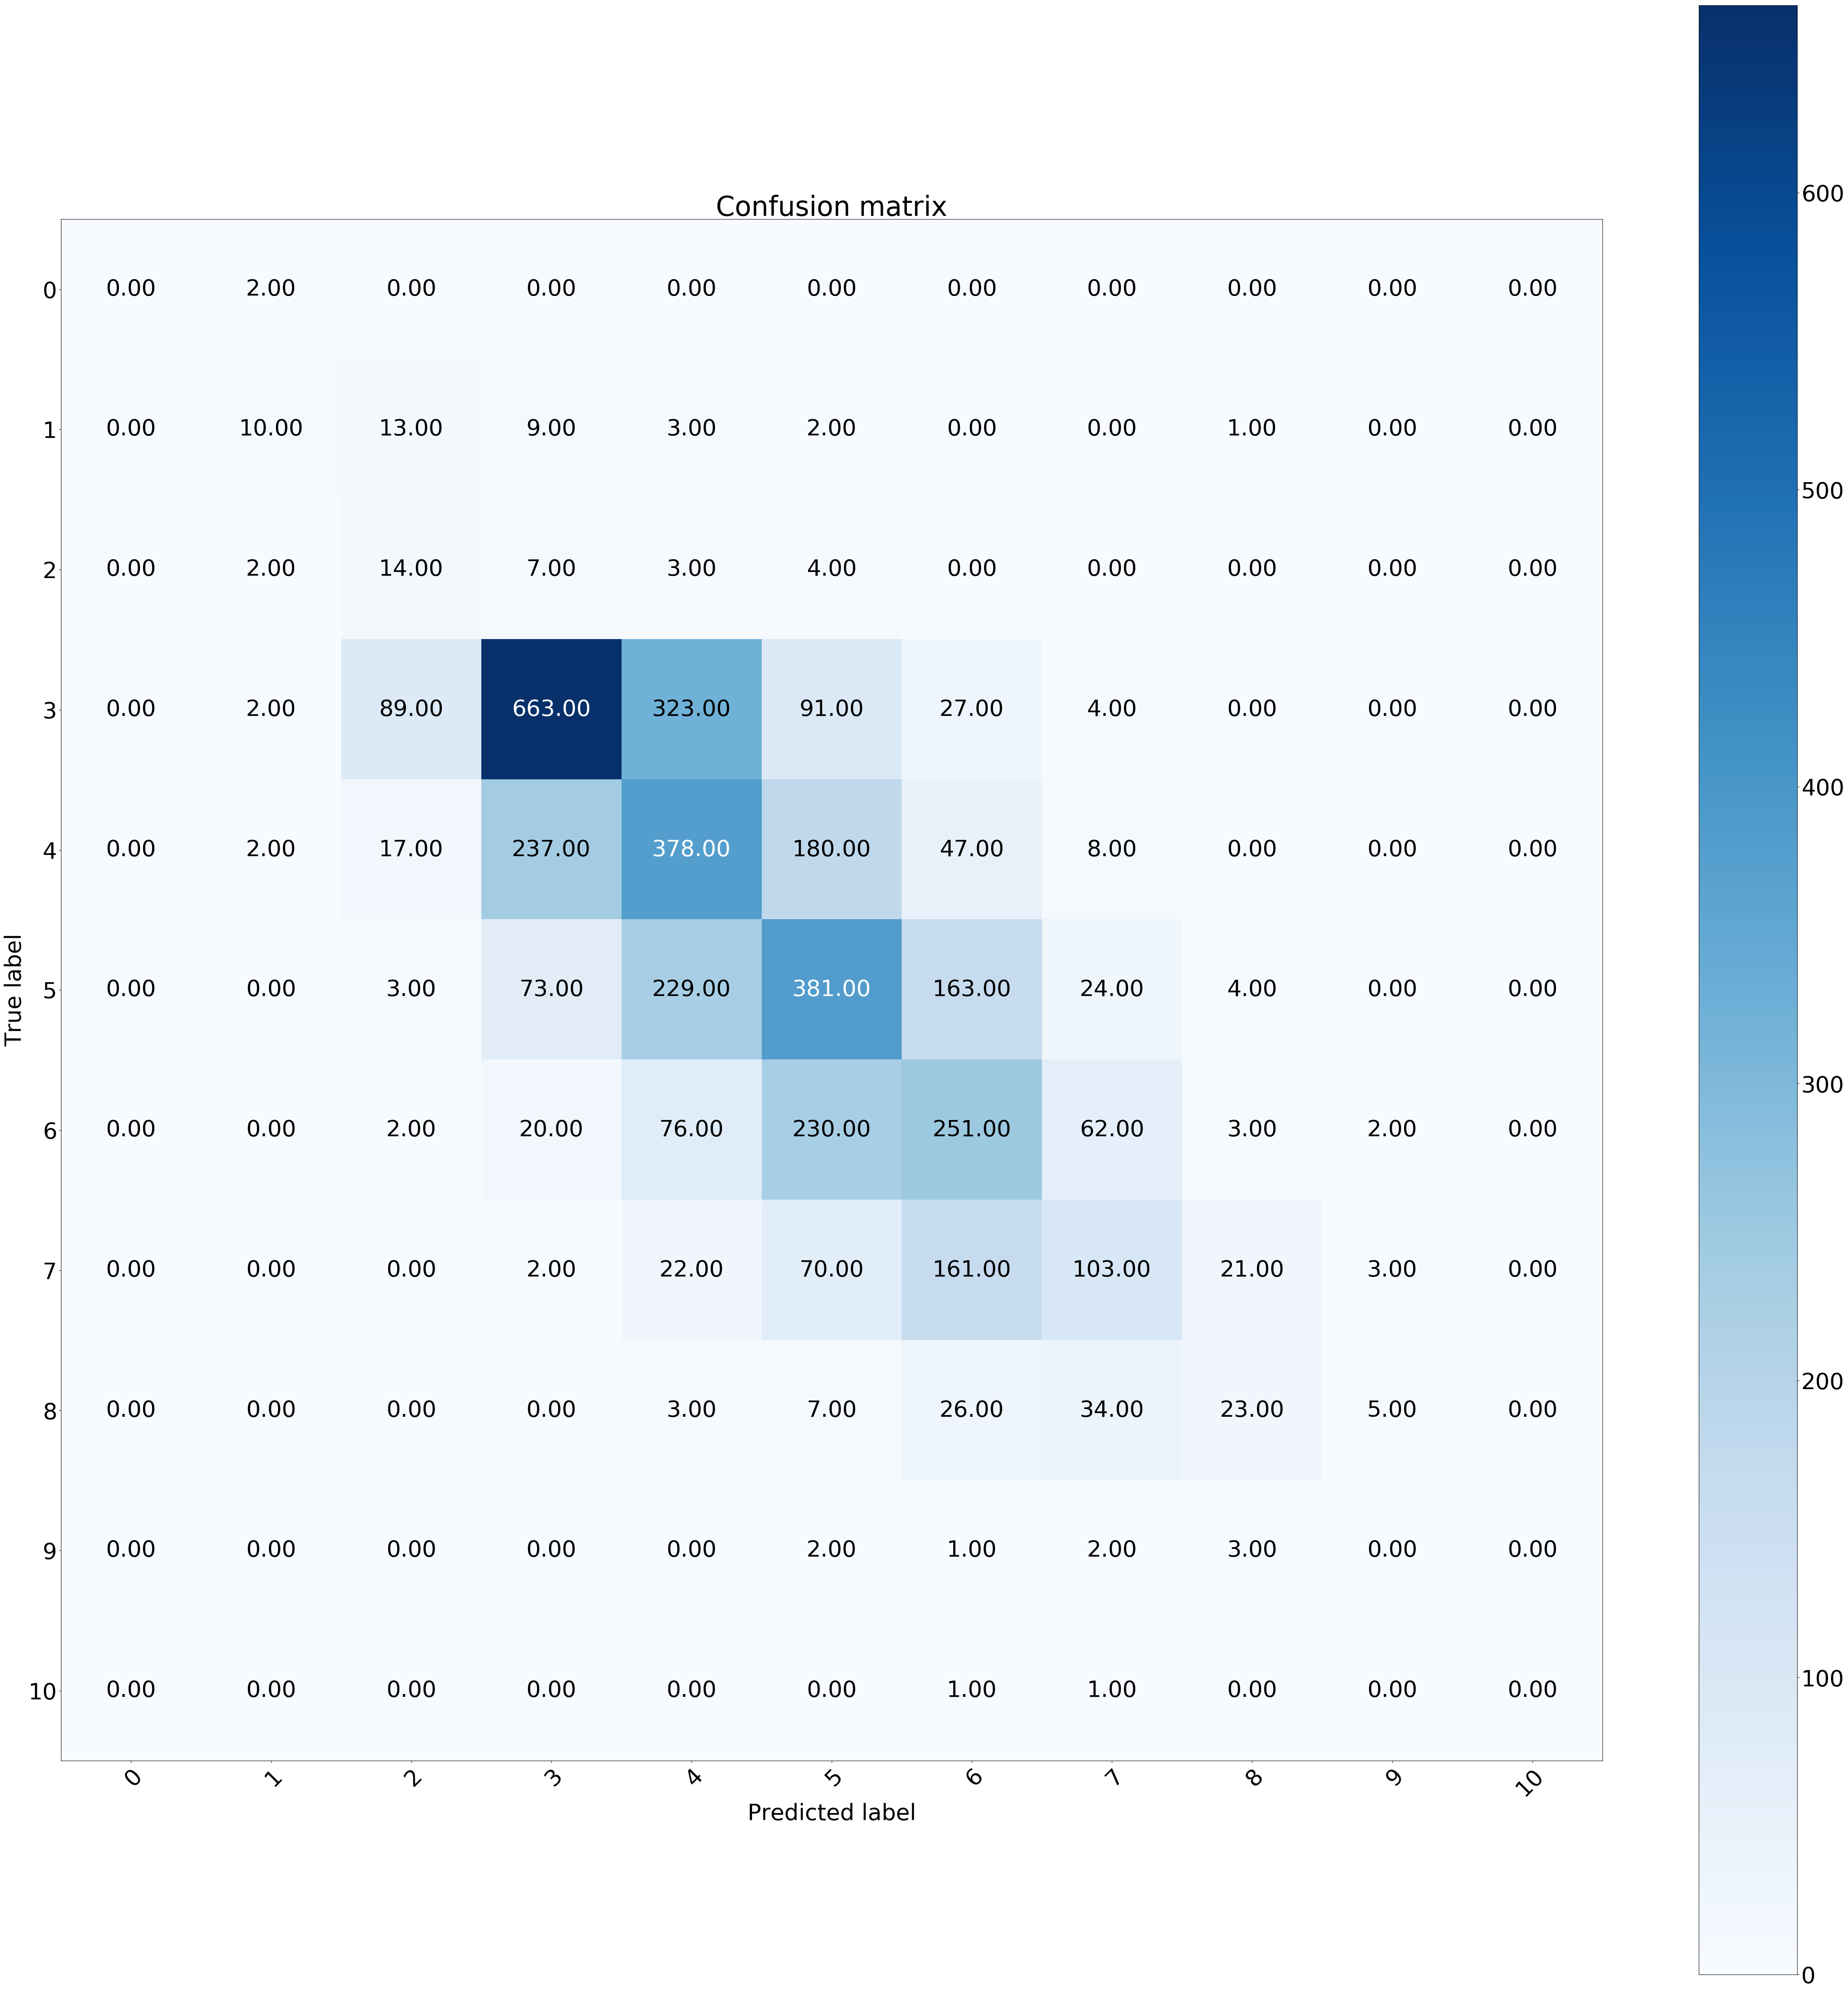

In [90]:
plt.rcParams.update({'font.size': 40})
cm = confusion_matrix(true, pred)
#pdb.set_trace()
#cm = cm.astype('float') / cm.sum(axis=1)[:,np.newaxis]
#pdb.set_trace()


fig, ax = plt.subplots(figsize=(50,50))
cmap=plt.cm.Blues
im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
ax.figure.colorbar(im, ax=ax)
# We want to show all ticks...
ax.set(xticks=np.arange(cm.shape[1]),
        yticks=np.arange(cm.shape[0]),
        # ... and label them with the respective list entries
        #xticklabels=classes, yticklabels=classes,
        title='Confusion matrix',
        ylabel='True label',
        xlabel='Predicted label')
# Rotate the tick labels and set their alignment.
plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
             rotation_mode="anchor", fontsize = 40.0)

# Loop over data dimensions and create text annotations.
fmt = '.2f'
thresh = cm.max() / 2.
for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        ax.text(j, i, format(cm[i, j], fmt),
                ha="center", va="center",fontsize = 40.0,
                color="white" if cm[i, j] > thresh else "black")
fig.tight_layout()

np.set_printoptions(precision=2)
plt.show()
import matplotlib as mpl
mpl.rcParams.update(mpl.rcParamsDefault)

[0.   0.21 1.  ] [0.   0.83 1.  ]
0.8080679512077019
0.8080679512077019


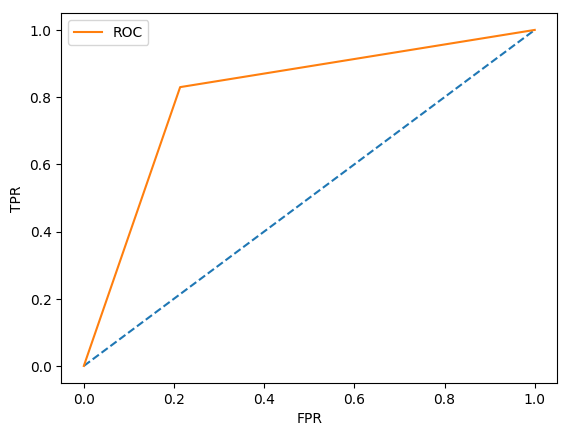

In [91]:
fpr, tpr, thresholds = roc_curve(true_binary, pred_binary)
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(fpr, tpr, label = 'ROC')
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.legend()
print(fpr, tpr)
print(auc(fpr,tpr))
print(roc_auc_score(true_binary, pred_binary))